In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r'C:\Users\Gareth\Desktop\Python_NEW\Notebooks\Fraud Detection\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


[Text(0, 0, 'Not Fraudulent'), Text(0, 0, 'Fraudulent')]

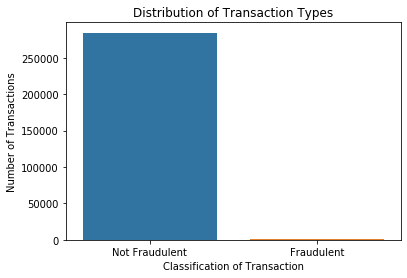

In [7]:
ax = sns.barplot(x = data.Class.value_counts().index, 
                y = data.Class.value_counts().values)
ax.set(xlabel = 'Classification of Transaction', ylabel = 'Number of Transactions', title = 'Distribution of Transaction Types')
ax.set_xticklabels(['Not Fraudulent', 'Fraudulent'])

In [8]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(f'Number of Fradulent transactions: {fraud.shape}')
print(f'Number of Non-Fradulent transactions: {normal.shape}')

Number of Fradulent transactions: (492, 31)
Number of Non-Fradulent transactions: (284315, 31)


In [9]:
print(f'Fraudulent transactions make up only {round((fraud.shape[0] / data.shape[0])*100,2)}% of the dataset')

Fraudulent transactions make up only 0.17% of the dataset


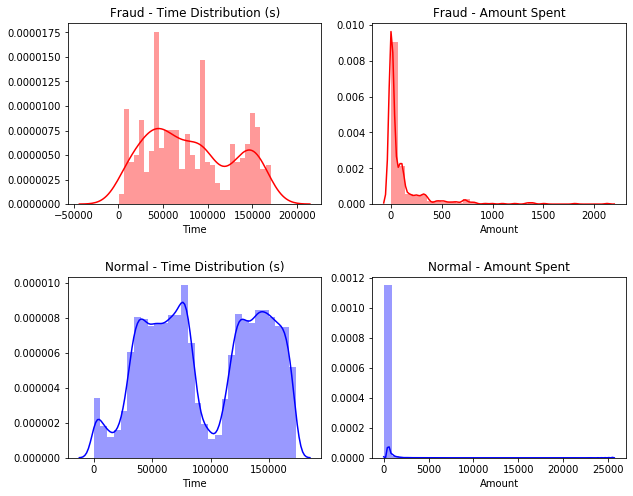

In [10]:
plt.figure(figsize = (10, 8))
bins = 30
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace = 0.4)
plt.title('Fraud - Time Distribution (s)')
sns.distplot(fraud['Time'], color = 'red', bins = bins)

plt.subplot(2, 2, 2)
plt.title('Fraud - Amount Spent')
sns.distplot(fraud['Amount'], color = 'red', bins = bins)

plt.subplot(2, 2, 3)
plt.title('Normal - Time Distribution (s)')
sns.distplot(normal['Time'], color = 'blue', bins = bins)

plt.subplot(2, 2, 4)
plt.title('Normal - Amount Spent')
sns.distplot(normal['Amount'], color = 'blue', bins = bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233294BDB08>,
      dtype=object)

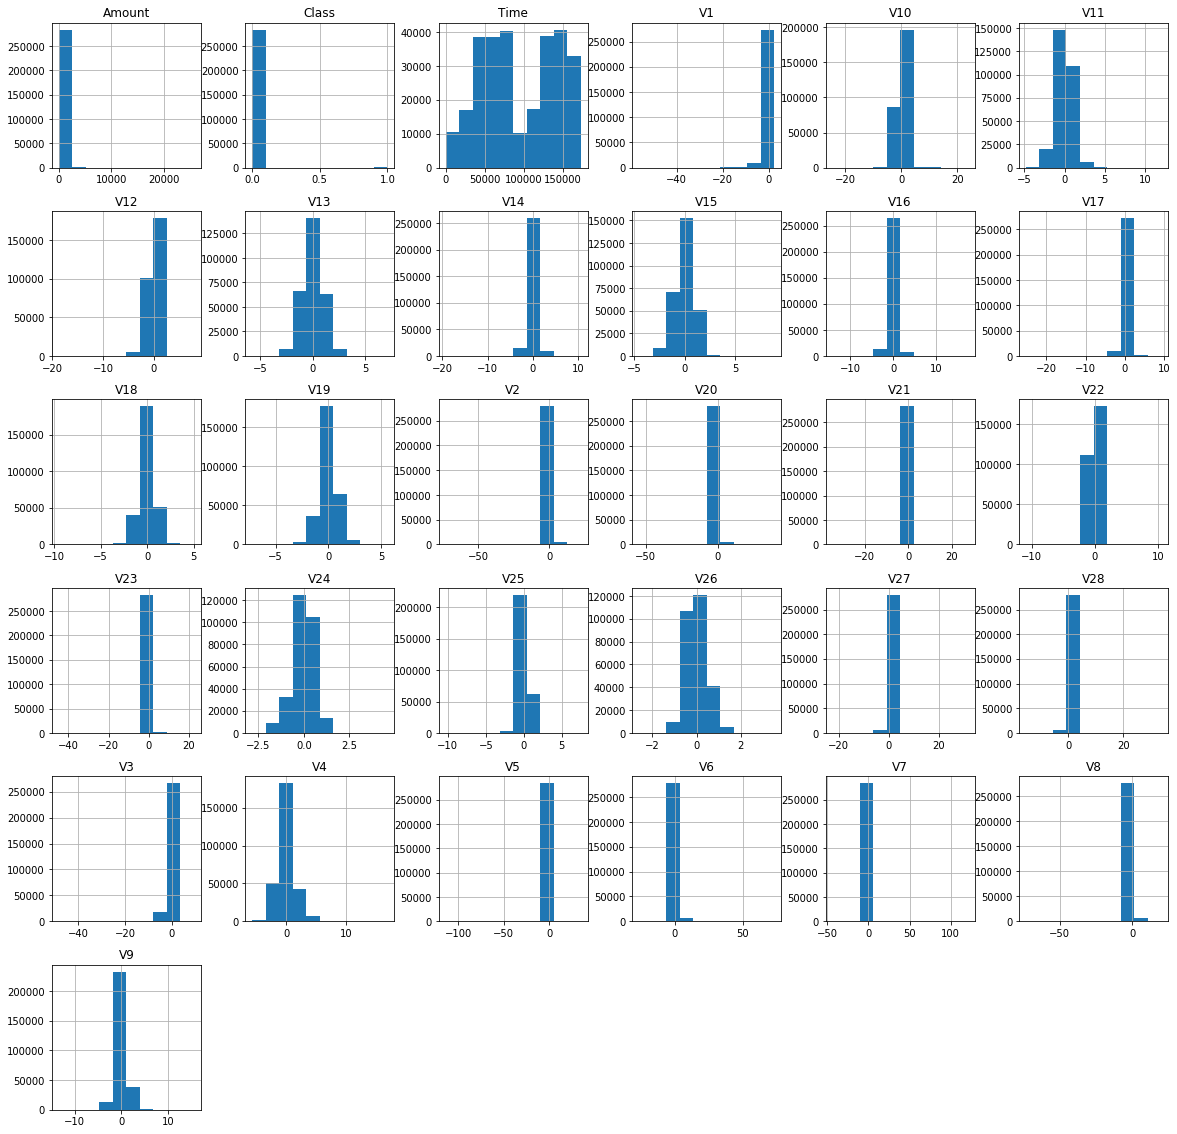

In [11]:
data.hist(figsize = (20, 20))

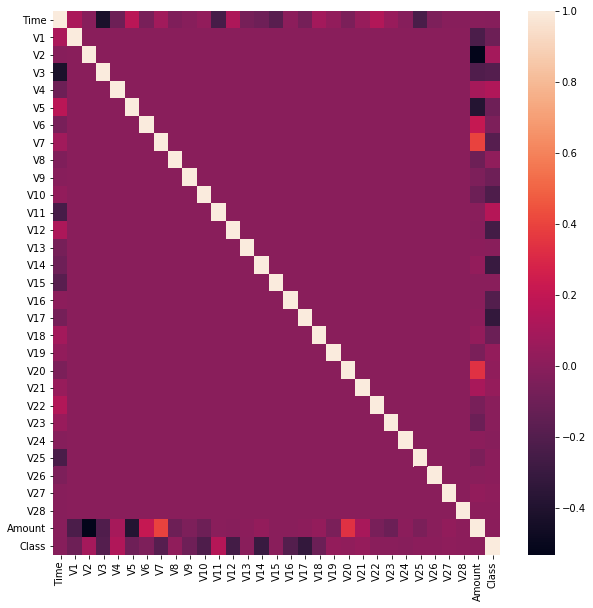

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = data.corr())
plt.show()

In [13]:
scaler = StandardScaler()

X = data.drop('Class', axis = 1)
y = data.Class

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                test_size = 0.3,
                                                random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,                                                          y_train_val,
                                                test_size = 0.2,                                                        random_state = 42)

In [14]:
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [15]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

(159491, 30)
(39873, 30)
(85443, 30)


In [16]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_validate_d = np.expand_dims(X_validate, -1)

In [17]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [60]:
model.compile(optimizer = Adam(0.0001), loss = 'binary_crossentropy',
metrics = [keras.metrics.AUC()])

r = model.fit(X_train_d, y_train,
            validation_data = (X_validate_d, y_val),
            batch_size = 500,
            epochs = epochs)

Train on 159491 samples, validate on 39873 samples
Epoch 1/20
159491/159491 [==============================] - 56s 351us/step - loss: 0.0777 - auc_4: 0.8131 - val_loss: 0.0072 - val_auc_4: 0.8798
Epoch 2/20
159491/159491 [==============================] - 54s 339us/step - loss: 0.0140 - auc_4: 0.8618 - val_loss: 0.0074 - val_auc_4: 0.8983
Epoch 3/20
159491/159491 [==============================] - 54s 341us/step - loss: 0.0105 - auc_4: 0.8816 - val_loss: 0.0063 - val_auc_4: 0.8984
Epoch 4/20
159491/159491 [==============================] - 56s 353us/step - loss: 0.0079 - auc_4: 0.8938 - val_loss: 0.0055 - val_auc_4: 0.8840
Epoch 5/20
159491/159491 [==============================] - 57s 360us/step - loss: 0.0071 - auc_4: 0.9017 - val_loss: 0.0050 - val_auc_4: 0.9057
Epoch 6/20
159491/159491 [==============================] - 56s 349us/step - loss: 0.0072 - auc_4: 0.9036 - val_loss: 0.0054 - val_auc_4: 0.9057
Epoch 7/20
159491/159491 [==============================] - 55s 343us/step - lo

In [61]:
score = model.evaluate(X_test_d, y_test)

85443/85443 [==============================] - 10s 117us/step


In [62]:
print(score)

[0.0025407890107259877, 0.959044337272644]


In [65]:
r.history

{'val_loss': [0.0071817334510718926,
  0.00741581574896011,
  0.006302800257400492,
  0.005476714578204354,
  0.005028303849832114,
  0.005369512929456864,
  0.0042909097664343195,
  0.005178644285320293,
  0.005090819953213736,
  0.004440646861266688,
  0.004048493124102266,
  0.004546476117771676,
  0.004381262203585939,
  0.004095381820656788,
  0.004231877667272886,
  0.00426929352113145,
  0.0040916529920220724,
  0.004017711905413629,
  0.003999915917959794,
  0.003997439130270015],
 'val_auc_4': [0.8798485994338989,
  0.8983306288719177,
  0.8984207510948181,
  0.8839726448059082,
  0.9057064652442932,
  0.9056646823883057,
  0.9128085970878601,
  0.9127181768417358,
  0.9128249287605286,
  0.9126121997833252,
  0.9126612544059753,
  0.9125581383705139,
  0.9124032258987427,
  0.9125151634216309,
  0.9194657206535339,
  0.91251140832901,
  0.9194718599319458,
  0.919741153717041,
  0.9267559051513672,
  0.9267305135726929],
 'loss': [0.07771195329368853,
  0.013987444656134945,


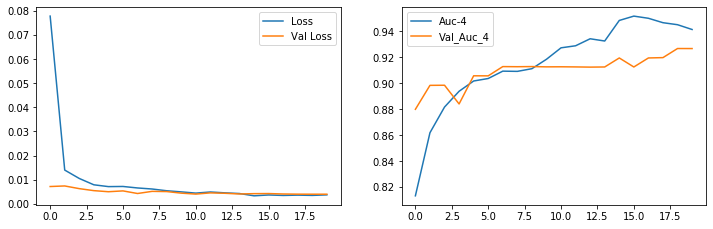

In [66]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_4'], label = 'Auc-4')
plt.plot(r.history['val_auc_4'], label = 'Val_Auc_4')
plt.legend()

In [68]:
def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [69]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train = True)
print_score(y_test, y_test_pred.round(), train = False)

Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 93.72%
			Recall Score: 78.05%
			F1 score: 85.17%
_______________________________________________
Confusion Matrix: 
 [[159189     15]
 [    63    224]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 86.99%
			Recall Score: 78.68%
			F1 score: 82.63%
_______________________________________________
Confusion Matrix: 
 [[85291    16]
 [   29   107]]



In [71]:
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_val),
              batch_size=50, 
              epochs=epochs, 
             )

Train on 159491 samples, validate on 39873 samples
Epoch 1/10
159491/159491 [==============================] - 28s 175us/step - loss: 0.0317 - auc_6: 0.5935 - val_loss: 0.0107 - val_auc_6: 0.9233
Epoch 2/10
159491/159491 [==============================] - 28s 175us/step - loss: 0.0097 - auc_6: 0.8344 - val_loss: 0.0087 - val_auc_6: 0.9348
Epoch 3/10
159491/159491 [==============================] - 27s 167us/step - loss: 0.0073 - auc_6: 0.8832 - val_loss: 0.0068 - val_auc_6: 0.9369
Epoch 4/10
159491/159491 [==============================] - 26s 166us/step - loss: 0.0064 - auc_6: 0.9043 - val_loss: 0.0058 - val_auc_6: 0.9303
Epoch 5/10
159491/159491 [==============================] - 26s 165us/step - loss: 0.0059 - auc_6: 0.8976 - val_loss: 0.0057 - val_auc_6: 0.9305
Epoch 6/10
159491/159491 [==============================] - 26s 160us/step - loss: 0.0057 - auc_6: 0.9064 - val_loss: 0.0057 - val_auc_6: 0.9301
Epoch 7/10
159491/159491 [==============================] - 27s 170us/step - lo

In [72]:
score = model.evaluate(X_test_d, y_test)

85443/85443 [==============================] - 4s 48us/step


In [73]:
print(score)

[0.003565621281897199, 0.9617367386817932]


In [75]:
r.history

{'val_loss': [0.010679345365211814,
  0.008680149977220544,
  0.006794722576269106,
  0.0057567085481879795,
  0.005663091347092707,
  0.005650428773675941,
  0.00480776810155212,
  0.00481002169379538,
  0.005046150415096485,
  0.004698315179409681],
 'val_auc_6': [0.9232684373855591,
  0.9347924590110779,
  0.9369207620620728,
  0.9303445219993591,
  0.9305443167686462,
  0.9300714135169983,
  0.9316582083702087,
  0.9245747923851013,
  0.9311021566390991,
  0.9251032471656799],
 'loss': [0.03166146310693831,
  0.009680226094245728,
  0.0073403411501614104,
  0.006439218035494399,
  0.0058538517301842865,
  0.005725411800875429,
  0.0049118827804815555,
  0.005021356593486209,
  0.0047066172615183866,
  0.004436587982338872],
 'auc_6': [0.59351844,
  0.83441365,
  0.88318336,
  0.9043294,
  0.89760685,
  0.906445,
  0.91742116,
  0.90875113,
  0.9283115,
  0.9230776]}

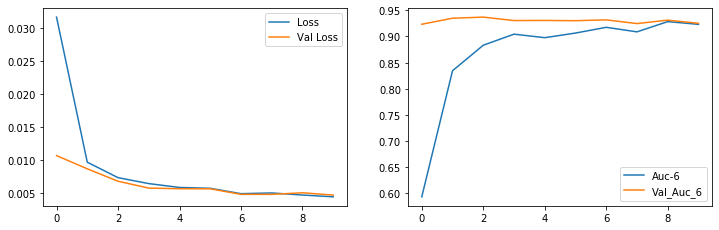

In [77]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_6'], label = 'Auc-6')
plt.plot(r.history['val_auc_6'], label = 'Val_Auc_6')
plt.legend()

In [78]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train = True)
print_score(y_test, y_test_pred.round(), train = False)

Train Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:	Precision Score: 86.31%
			Recall Score: 79.09%
			F1 score: 82.55%
_______________________________________________
Confusion Matrix: 
 [[159168     36]
 [    60    227]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:	Precision Score: 77.46%
			Recall Score: 80.88%
			F1 score: 79.14%
_______________________________________________
Confusion Matrix: 
 [[85275    32]
 [   26   110]]



In [79]:
X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concatinating X_train and y_train
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2557,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,...,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00,0
247823,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,...,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28,0
152342,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,...,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00,0
103385,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,...,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98,0
8771,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,...,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31,0


In [80]:
from sklearn.utils import resample

minority_class = df[df.Class == 1]
majority_class = df[df.Class == 0]

majority_downsample = resample(majority_class, replace=False, 
                               n_samples=minority_class.shape[0], 
                               random_state=42)

df_2 = pd.concat([majority_downsample, minority_class])
df_2.Class.value_counts()

1    356
0    356
Name: Class, dtype: int64

In [81]:
scaler = StandardScaler()

X = df_2.drop('Class', axis=1)
y = df_2.Class

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [82]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_validate = np.expand_dims(X_validate, -1)

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(498, 30, 1)
(498,)
(214, 30, 1)
(214,)
(85443, 30, 1)
(85443,)


In [83]:
epochs = 150
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.00001), loss='binary_crossentropy', metrics=["accuracy"])
r = model.fit(X_train, y_train, 
              validation_data=(X_validate, y_validate),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

cy: 0.8271
Epoch 15/150
498/498 [==============================] - 0s 763us/step - loss: 0.3517 - accuracy: 0.8635 - val_loss: 0.5007 - val_accuracy: 0.8411
Epoch 16/150
498/498 [==============================] - 0s 761us/step - loss: 0.3745 - accuracy: 0.8514 - val_loss: 0.4828 - val_accuracy: 0.8645
Epoch 17/150
498/498 [==============================] - 0s 814us/step - loss: 0.3551 - accuracy: 0.8635 - val_loss: 0.4649 - val_accuracy: 0.8879
Epoch 18/150
498/498 [==============================] - 0s 865us/step - loss: 0.4029 - accuracy: 0.8715 - val_loss: 0.4467 - val_accuracy: 0.9019
Epoch 19/150
498/498 [==============================] - 0s 869us/step - loss: 0.3296 - accuracy: 0.8675 - val_loss: 0.4285 - val_accuracy: 0.9112
Epoch 20/150
498/498 [==============================] - 0s 881us/step - loss: 0.3635 - accuracy: 0.8414 - val_loss: 0.4090 - val_accuracy: 0.9206
Epoch 21/150
498/498 [==============================] - 0s 836us/step - loss: 0.3429 - accuracy: 0.8795 - val_los

In [84]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 9s 104us/step
[0.07452494840221274, 0.9799866676330566]


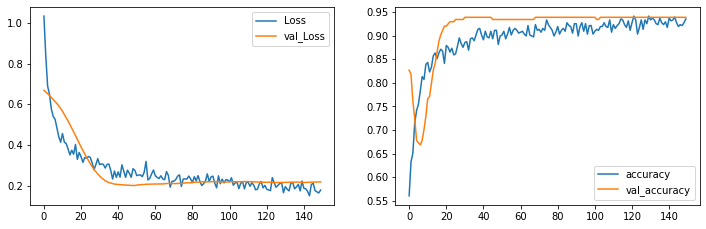

In [85]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [86]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 95.18%
_______________________________________________
Classification Report:	Precision Score: 99.17%
			Recall Score: 91.57%
			F1 score: 95.22%
_______________________________________________
Confusion Matrix: 
 [[235   2]
 [ 22 239]]

Test Result:
Accuracy Score: 98.00%
_______________________________________________
Classification Report:	Precision Score: 6.81%
			Recall Score: 91.18%
			F1 score: 12.67%
_______________________________________________
Confusion Matrix: 
 [[83609  1698]
 [   12   124]]

